In [ ]:
import pandas as pd
import glob

print("="*60)
print("MERGING ALL MONTHLY DATA FILES")
print("="*60)

# Get all Excel files
file_pattern = 'DISTRIBUSI FM SALES_2025*.xlsx'
all_files = glob.glob(file_pattern)
all_files.sort()  # Sort by filename (chronological order)

print(f"\nFound {len(all_files)} files:")
for i, file in enumerate(all_files, 1):
    print(f"  {i}. {file}")

# Read and combine all files
df_list = []
for file in all_files:
    print(f"\nReading: {file}...")
    temp_df = pd.read_excel(file)
    
    # Add month identifier
    month = file.split('_')[-1].replace('.xlsx', '')  # Extract '202501', '202502', etc
    temp_df['data_month'] = month
    
    df_list.append(temp_df)
    print(f"  → Rows: {len(temp_df):,}")

# Combine all dataframes
df = pd.concat(df_list, ignore_index=True)

print("\n" + "="*60)
print("MERGING SUMMARY")
print("="*60)
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Date Range: {df['data_month'].min()} to {df['data_month'].max()}")


output_file = 'combined_data_followupsales_2025.csv'
df.to_csv(output_file, index=False)

print("\n" + "="*60)
print("✅ MERGING COMPLETE!")
print("="*60)
print(f"Output File: {output_file}")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")

MERGING ALL MONTHLY DATA FILES

Found 7 files:
  1. DISTRIBUSI FM SALES_202501.xlsx
  2. DISTRIBUSI FM SALES_202502.xlsx
  3. DISTRIBUSI FM SALES_202503.xlsx
  4. DISTRIBUSI FM SALES_202504.xlsx
  5. DISTRIBUSI FM SALES_202505.xlsx
  6. DISTRIBUSI FM SALES_202506.xlsx
  7. DISTRIBUSI FM SALES_202507.xlsx

Reading: DISTRIBUSI FM SALES_202501.xlsx...
  → Rows: 713,943

Reading: DISTRIBUSI FM SALES_202502.xlsx...
  → Rows: 369,045

Reading: DISTRIBUSI FM SALES_202503.xlsx...
  → Rows: 312,579

Reading: DISTRIBUSI FM SALES_202504.xlsx...
  → Rows: 229,419

Reading: DISTRIBUSI FM SALES_202505.xlsx...
  → Rows: 162,289

Reading: DISTRIBUSI FM SALES_202506.xlsx...
  → Rows: 187,373

Reading: DISTRIBUSI FM SALES_202507.xlsx...
  → Rows: 269,315

MERGING SUMMARY
Total Rows: 2,243,963
Total Columns: 30
Date Range: 202501 to 202507

✅ MERGING COMPLETE!
Output File: combined_data_followupsales_2025.csv
Total Rows: 2,243,963
Total Columns: 30


# Phase 2 

## Data Understanding

### Section 1 

SECTION 1: DATA OVERVIEW

1.1 BASIC INFORMATION
Shape: 2,243,963 rows × 30 columns
Memory: 1782.14 MB
Period: 202501 to 202507

1.2 DUPLICATE CHECK
Duplicates: 0 rows (0.00%)

1.3 MONTHLY DISTRIBUTION
data_month
202501    713943
202502    369045
202503    312579
202504    229419
202505    162289
202506    187373
202507    269315
Name: count, dtype: int64


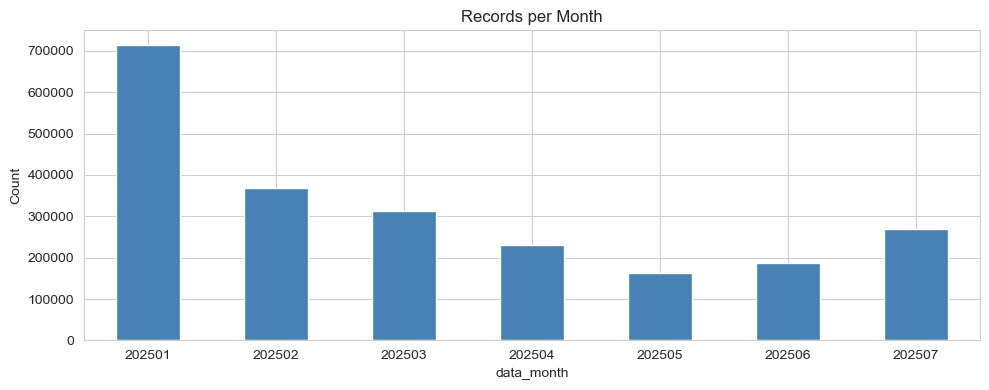


1.4 COLUMN SUMMARY
            Column    Type  Non_Null   Null  Null_%  Unique
               r_n   int64   2243963      0    0.00       1
              r_ng   int64   2243963      0    0.00       1
            r_nuug   int64   2243963      0    0.00       1
             r_nuu   int64   2243963      0    0.00       1
           cust_no   int64   2243963      0    0.00 2014001
periode_first_dist   int64   2243963      0    0.00       7
           is_book  object   2243963      0    0.00       2
      last_type_fu  object   2018929 225034   10.03       2
           appl_no  object   2243963      0    0.00 2029669
       contract_no   int64   2243963      0    0.00 2029441
         buss_unit  object   2243963      0    0.00       2
          cust_sex  object   2243963      0    0.00       2
      marital_stat  object   2243963      0    0.00       4
              usia   int64   2243963      0    0.00      62
          edu_type  object   2243963      0    0.00       8
      no_of_depend f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("="*60)
print("SECTION 1: DATA OVERVIEW")
print("="*60)

# Load data
df = pd.read_csv('combined_data_followupsales_2025.csv')

# ============================================================
# 1.1 BASIC INFO
# ============================================================
print("\n1.1 BASIC INFORMATION")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Period: {df['data_month'].min()} to {df['data_month'].max()}")

# ============================================================
# 1.2 DUPLICATES
# ============================================================
print("\n1.2 DUPLICATE CHECK")
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates:,} rows ({duplicates/len(df)*100:.2f}%)")

# ============================================================
# 1.3 MONTHLY DISTRIBUTION
# ============================================================
print("\n1.3 MONTHLY DISTRIBUTION")
monthly = df['data_month'].value_counts().sort_index()
print(monthly)

# Plot
plt.figure(figsize=(10, 4))
monthly.plot(kind='bar', color='steelblue')
plt.title('Records per Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# 1.4 COLUMN SUMMARY
# ============================================================
print("\n1.4 COLUMN SUMMARY")
summary = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values,
    'Non_Null': df.notna().sum().values,
    'Null': df.isna().sum().values,
    'Null_%': (df.isna().sum() / len(df) * 100).values.round(2),
    'Unique': [df[col].nunique() for col in df.columns]
})
print(summary.to_string(index=False))

print("\n" + "="*60)
print("✅ SECTION 1 COMPLETE")
print("="*60)

### Section 2

SECTION 2: TARGET VARIABLES ANALYSIS

2.1 STAGE 1 TARGET: last_type_fu (Channel Recommendation)
------------------------------------------------------------

Distribution:
Channel   Count  Percentage
      P 1384051       68.55
      V  634878       31.45

Missing: 225,034 rows (10.03%)


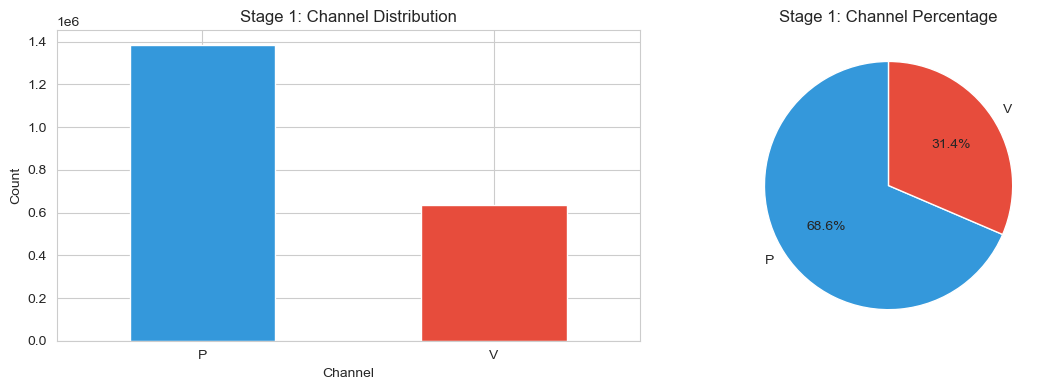


2.2 STAGE 2 TARGET: is_book (Booking Success)
------------------------------------------------------------

Distribution:
    Status   Count  Percentage
NO_BOOKING 1923281       85.71
   BOOKING  320682       14.29

Missing: 0 rows (0.00%)


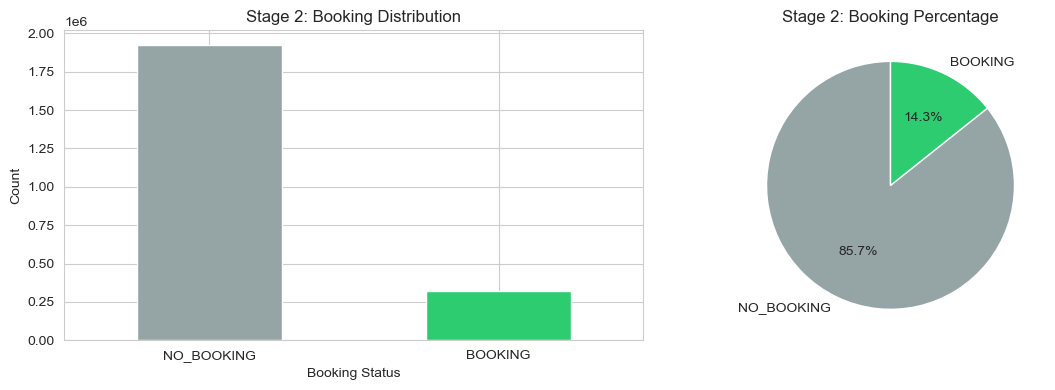


2.3 CHANNEL vs BOOKING (Two-Stage Relationship)
------------------------------------------------------------

Cross-tabulation:
is_book       BOOKING  NO_BOOKING      All
last_type_fu                              
P              166267     1217784  1384051
V               87921      546957   634878
All            254188     1764741  2018929

Conversion Rate by Channel:
is_book       BOOKING  NO_BOOKING
last_type_fu                     
P               12.01       87.99
V               13.85       86.15


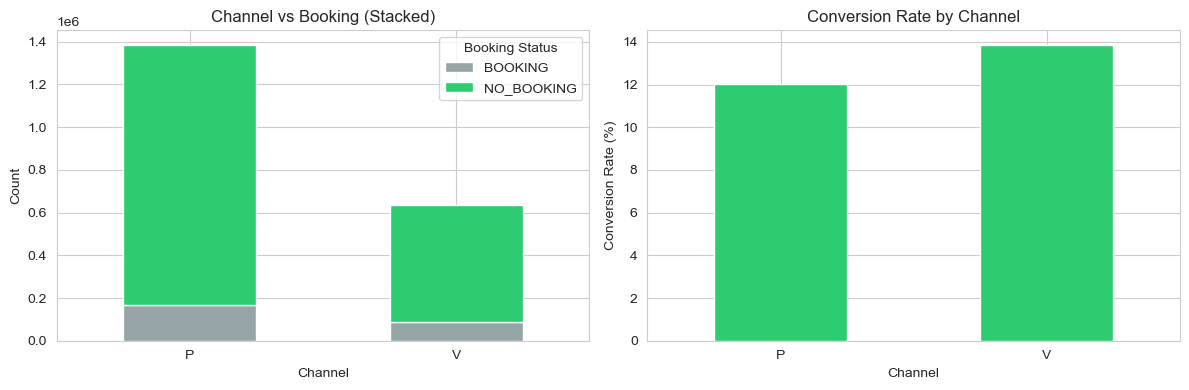


2.4 MONTHLY TRENDS
------------------------------------------------------------

Channel Distribution per Month:
last_type_fu       P       V
data_month                  
202501        421677  202871
202502        235744  100934
202503        193806   89957
202504        151102   64018
202505        100963   49407
202506        114206   57223
202507        166553   70468

Booking Distribution per Month:
is_book     BOOKING  NO_BOOKING
data_month                     
202501        72309      641634
202502        59746      309299
202503        53402      259177
202504        26556      202863
202505        39843      122446
202506        32174      155199
202507        36652      232663

Monthly Conversion Rate (%):
data_month
202501    10.13
202502    16.19
202503    17.08
202504    11.58
202505    24.55
202506    17.17
202507    13.61
Name: BOOKING, dtype: float64


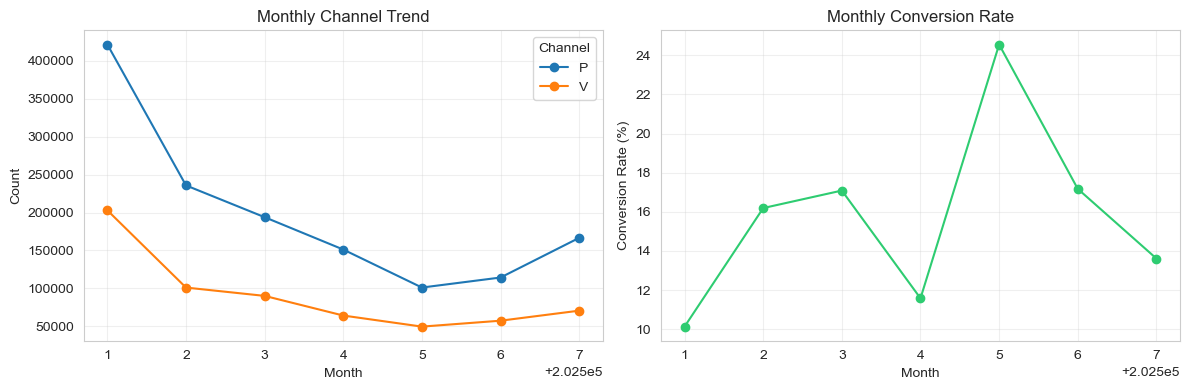


2.5 KEY INSIGHTS
------------------------------------------------------------

Stage 1 (Channel):
  - PHONE: 68.6%
  - VISIT: 31.4%
  - Missing: 10.0%
  - Balance: Imbalanced

Stage 2 (Booking):
  - BOOKING: 14.3%
  - NO_BOOKING: 85.7%
  - Imbalance Ratio: 1:6.0
  - SMOTE Needed: Yes

Overall:
  - Total Records: 2,243,963
  - Usable for Stage 1: 2,018,929
  - Conversion Rate: 14.29%

SECTION 2 COMPLETE


In [4]:
print("="*60)
print("SECTION 2: TARGET VARIABLES ANALYSIS")
print("="*60)

# ============================================================
# 2.1 STAGE 1 TARGET: last_type_fu
# ============================================================
print("\n2.1 STAGE 1 TARGET: last_type_fu (Channel Recommendation)")
print("-"*60)

# Distribution
print("\nDistribution:")
stage1_dist = df['last_type_fu'].value_counts()
stage1_pct = df['last_type_fu'].value_counts(normalize=True) * 100
stage1_summary = pd.DataFrame({
    'Channel': stage1_dist.index,
    'Count': stage1_dist.values,
    'Percentage': stage1_pct.values.round(2)
})
print(stage1_summary.to_string(index=False))

# Missing values
missing_s1 = df['last_type_fu'].isna().sum()
print(f"\nMissing: {missing_s1:,} rows ({missing_s1/len(df)*100:.2f}%)")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
stage1_dist.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Stage 1: Channel Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Channel')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(stage1_pct.values, labels=stage1_pct.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Stage 1: Channel Percentage')

plt.tight_layout()
plt.show()

# ============================================================
# 2.2 STAGE 2 TARGET: is_book
# ============================================================
print("\n2.2 STAGE 2 TARGET: is_book (Booking Success)")
print("-"*60)

# Distribution
print("\nDistribution:")
stage2_dist = df['is_book'].value_counts()
stage2_pct = df['is_book'].value_counts(normalize=True) * 100
stage2_summary = pd.DataFrame({
    'Status': stage2_dist.index,
    'Count': stage2_dist.values,
    'Percentage': stage2_pct.values.round(2)
})
print(stage2_summary.to_string(index=False))

# Missing values
missing_s2 = df['is_book'].isna().sum()
print(f"\nMissing: {missing_s2:,} rows ({missing_s2/len(df)*100:.2f}%)")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
stage2_dist.plot(kind='bar', ax=axes[0], color=['#95a5a6', '#2ecc71'])
axes[0].set_title('Stage 2: Booking Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Booking Status')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
colors = ['#95a5a6', '#2ecc71']
axes[1].pie(stage2_pct.values, labels=stage2_pct.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Stage 2: Booking Percentage')

plt.tight_layout()
plt.show()

# ============================================================
# 2.3 CHANNEL vs BOOKING (Cross-tabulation)
# ============================================================
print("\n2.3 CHANNEL vs BOOKING (Two-Stage Relationship)")
print("-"*60)

# Cross-tab
crosstab = pd.crosstab(df['last_type_fu'], df['is_book'], margins=True)
print("\nCross-tabulation:")
print(crosstab)

# Conversion rate by channel
print("\nConversion Rate by Channel:")
conv_rate = pd.crosstab(df['last_type_fu'], df['is_book'], normalize='index') * 100
print(conv_rate.round(2))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Stacked bar
crosstab_no_margin = pd.crosstab(df['last_type_fu'], df['is_book'])
crosstab_no_margin.plot(kind='bar', stacked=True, ax=axes[0], 
                        color=['#95a5a6', '#2ecc71'])
axes[0].set_title('Channel vs Booking (Stacked)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Channel')
axes[0].legend(title='Booking Status')
axes[0].tick_params(axis='x', rotation=0)

# Conversion rate
conv_rate_booking = conv_rate['BOOKING'] if 'BOOKING' in conv_rate.columns else conv_rate.iloc[:, 1]
conv_rate_booking.plot(kind='bar', ax=axes[1], color='#2ecc71')
axes[1].set_title('Conversion Rate by Channel')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_xlabel('Channel')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# ============================================================
# 2.4 MONTHLY TRENDS
# ============================================================
print("\n2.4 MONTHLY TRENDS")
print("-"*60)

# Channel trend
print("\nChannel Distribution per Month:")
monthly_channel = pd.crosstab(df['data_month'], df['last_type_fu'])
print(monthly_channel)

# Booking trend
print("\nBooking Distribution per Month:")
monthly_booking = pd.crosstab(df['data_month'], df['is_book'])
print(monthly_booking)

# Conversion rate trend
print("\nMonthly Conversion Rate (%):")
monthly_conv = pd.crosstab(df['data_month'], df['is_book'], normalize='index') * 100
monthly_conv_rate = monthly_conv['BOOKING'] if 'BOOKING' in monthly_conv.columns else monthly_conv.iloc[:, 1]
print(monthly_conv_rate.round(2))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Channel trend
monthly_channel.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Monthly Channel Trend')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Month')
axes[0].legend(title='Channel')
axes[0].grid(alpha=0.3)

# Conversion rate trend
monthly_conv_rate.plot(kind='line', marker='o', ax=axes[1], color='#2ecc71')
axes[1].set_title('Monthly Conversion Rate')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_xlabel('Month')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 2.5 KEY INSIGHTS
# ============================================================
print("\n2.5 KEY INSIGHTS")
print("-"*60)

# Calculate key metrics
phone_pct = stage1_pct.get('P', 0)
visit_pct = stage1_pct.get('V', 0)
booking_pct = stage2_pct.get('BOOKING', 0)
no_booking_pct = stage2_pct.get('NO_BOOKING', 0)

print(f"""
Stage 1 (Channel):
  - PHONE: {phone_pct:.1f}%
  - VISIT: {visit_pct:.1f}%
  - Missing: {missing_s1/len(df)*100:.1f}%
  - Balance: {'Balanced' if abs(phone_pct - visit_pct) < 20 else 'Imbalanced'}

Stage 2 (Booking):
  - BOOKING: {booking_pct:.1f}%
  - NO_BOOKING: {no_booking_pct:.1f}%
  - Imbalance Ratio: 1:{no_booking_pct/booking_pct:.1f}
  - SMOTE Needed: {'Yes' if booking_pct < 30 else 'No'}

Overall:
  - Total Records: {len(df):,}
  - Usable for Stage 1: {len(df) - missing_s1:,}
  - Conversion Rate: {booking_pct:.2f}%
""")

print("="*60)
print("SECTION 2 COMPLETE")
print("="*60)

### Section 3

SECTION 3: MISSING VALUES ANALYSIS

3.1 MISSING VALUES OVERVIEW
------------------------------------------------------------

Columns with Missing Values: 10/30

        Column  Missing_Count  Missing_Pct Data_Type
  last_type_fu         225034        10.03    object
    month_inst           7611         0.34   float64
     cust_prov            205         0.01    object
        grs_dp            155         0.01   float64
      cust_kec            122         0.01    object
      cust_kel            122         0.01    object
bpkb_same_name             71         0.00    object
        salary             67         0.00   float64
  no_of_depend             20         0.00   float64
    house_stat              4         0.00    object

3.2 MISSING VALUES VISUALIZATION
------------------------------------------------------------


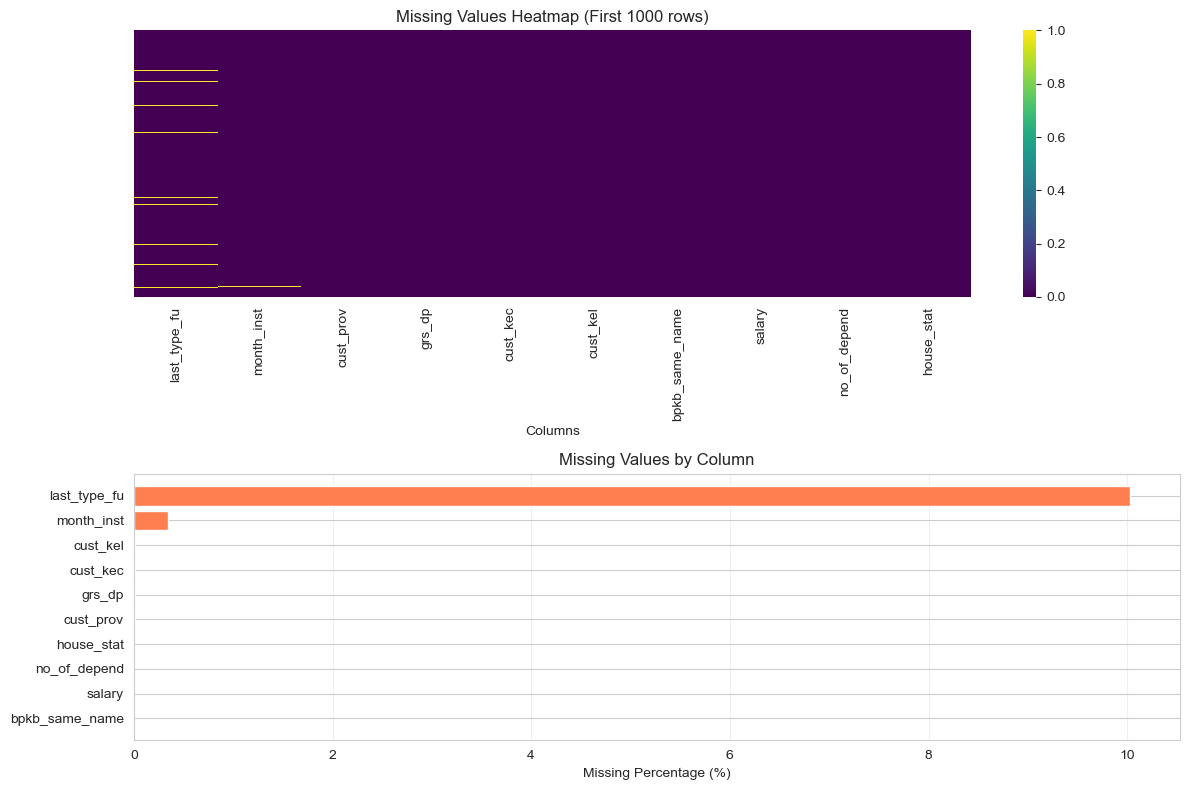


3.3 CRITICAL ANALYSIS: last_type_fu (Stage 1 Target)
------------------------------------------------------------

Missing in last_type_fu:
  Count: 225,034 rows
  Percentage: 10.03%
  Impact: HIGH - Cannot use for Stage 1 modeling

3.3.1 Missing Pattern Analysis:

Missing vs Booking Status:
is_book               BOOKING  NO_BOOKING
last_type_fu_missing                     
0                      254188     1764741
1                       66494      158540

Chi-square test:
  Chi2: 47535.01
  P-value: 0.0000
  Result: Not Random (MAR/MNAR)

Missing by Month:
            Missing_Count  Missing_Rate
data_month                             
202501              89395         12.52
202502              32367          8.77
202503              28816          9.22
202504              14299          6.23
202505              11919          7.34
202506              15944          8.51
202507              32294         11.99


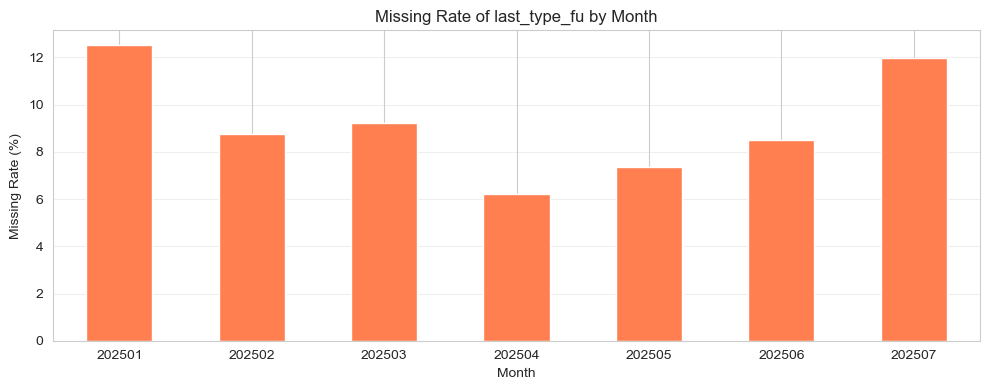


3.4 OTHER MISSING VALUES ANALYSIS
------------------------------------------------------------

month_inst:
  Missing: 7,611 (0.34%)
  Type: float64
  Severity: LOW

cust_prov:
  Missing: 205 (0.01%)
  Type: object
  Severity: LOW

grs_dp:
  Missing: 155 (0.01%)
  Type: float64
  Severity: LOW

cust_kec:
  Missing: 122 (0.01%)
  Type: object
  Severity: LOW

cust_kel:
  Missing: 122 (0.01%)
  Type: object
  Severity: LOW

bpkb_same_name:
  Missing: 71 (0.00%)
  Type: object
  Severity: LOW

salary:
  Missing: 67 (0.00%)
  Type: float64
  Severity: LOW

no_of_depend:
  Missing: 20 (0.00%)
  Type: float64
  Severity: LOW

house_stat:
  Missing: 4 (0.00%)
  Type: object
  Severity: LOW

3.5 MISSING VALUES CORRELATION
------------------------------------------------------------

Correlation between missing values:
                Var1               Var2  Correlation
   cust_prov_missing   cust_kec_missing        0.771
   cust_prov_missing   cust_kel_missing        0.771
    cust_kec_missi

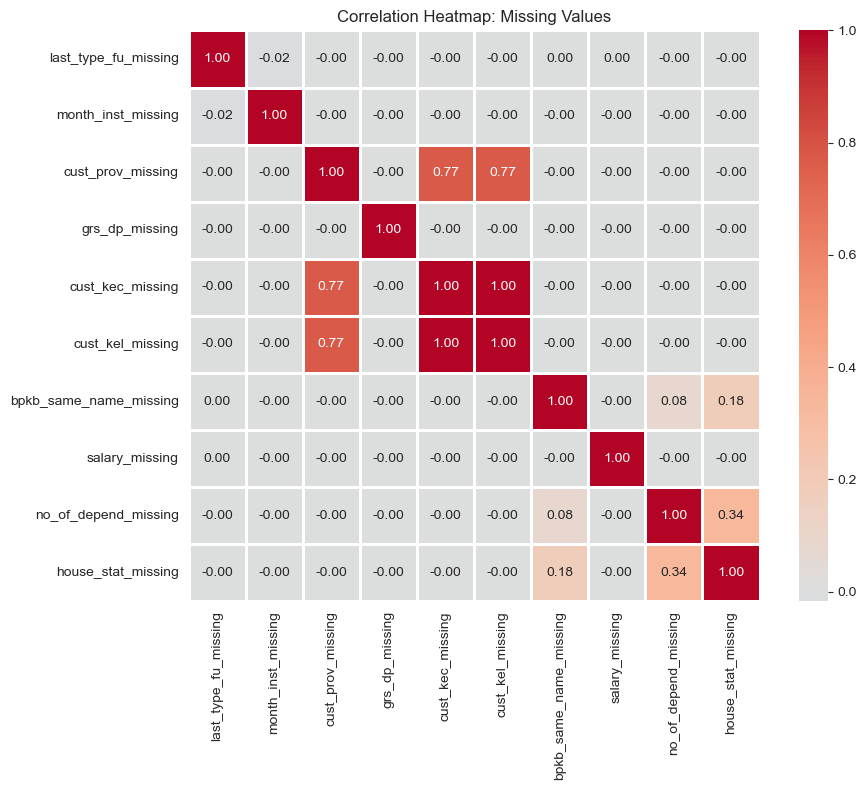


3.6 HANDLING STRATEGY RECOMMENDATION
------------------------------------------------------------

        Column  Missing_%    Type                                Strategy
  last_type_fu      10.03  object DROP rows (cannot model without target)
    month_inst       0.34 float64                       Median imputation
     cust_prov       0.01  object                         Mode imputation
        grs_dp       0.01 float64                       Median imputation
      cust_kec       0.01  object                         Mode imputation
      cust_kel       0.01  object                         Mode imputation
bpkb_same_name       0.00  object                         Mode imputation
        salary       0.00 float64                       Median imputation
  no_of_depend       0.00 float64                       Median imputation
    house_stat       0.00  object                         Mode imputation

3.7 KEY INSIGHTS
------------------------------------------------------------

Missin

In [5]:
print("="*60)
print("SECTION 3: MISSING VALUES ANALYSIS")
print("="*60)

# ============================================================
# 3.1 MISSING VALUES OVERVIEW
# ============================================================
print("\n3.1 MISSING VALUES OVERVIEW")
print("-"*60)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isna().sum().values,
    'Missing_Pct': (df.isna().sum() / len(df) * 100).values.round(2),
    'Data_Type': df.dtypes.values
})

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"\nColumns with Missing Values: {len(missing_data)}/{len(df.columns)}")
print("\n" + missing_data.to_string(index=False))

# ============================================================
# 3.2 MISSING VALUES VISUALIZATION
# ============================================================
print("\n3.2 MISSING VALUES VISUALIZATION")
print("-"*60)

# Heatmap
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Heatmap - all columns with missing
cols_with_missing = missing_data['Column'].tolist()
if len(cols_with_missing) > 0:
    missing_matrix = df[cols_with_missing].isna()
    sns.heatmap(missing_matrix.head(1000), cbar=True, yticklabels=False, 
                cmap='viridis', ax=axes[0])
    axes[0].set_title('Missing Values Heatmap (First 1000 rows)')
    axes[0].set_xlabel('Columns')
else:
    axes[0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    axes[0].axis('off')

# Bar chart
missing_data_plot = missing_data.sort_values('Missing_Pct', ascending=True)
axes[1].barh(missing_data_plot['Column'], missing_data_plot['Missing_Pct'], color='coral')
axes[1].set_xlabel('Missing Percentage (%)')
axes[1].set_title('Missing Values by Column')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 3.3 CRITICAL MISSING: last_type_fu (Stage 1 Target)
# ============================================================
print("\n3.3 CRITICAL ANALYSIS: last_type_fu (Stage 1 Target)")
print("-"*60)

missing_target_s1 = df['last_type_fu'].isna().sum()
print(f"\nMissing in last_type_fu:")
print(f"  Count: {missing_target_s1:,} rows")
print(f"  Percentage: {missing_target_s1/len(df)*100:.2f}%")
print(f"  Impact: {'HIGH - Cannot use for Stage 1 modeling' if missing_target_s1 > 0 else 'No impact'}")

# Check if missing is random or pattern
print("\n3.3.1 Missing Pattern Analysis:")

# Create missing indicator
df_temp = df.copy()
df_temp['last_type_fu_missing'] = df_temp['last_type_fu'].isna().astype(int)

# Check correlation with other variables
print("\nMissing vs Booking Status:")
if 'is_book' in df.columns:
    missing_vs_booking = pd.crosstab(df_temp['last_type_fu_missing'], df_temp['is_book'])
    print(missing_vs_booking)
    
    # Chi-square test
    from scipy.stats import chi2_contingency
    chi2, pval, dof, expected = chi2_contingency(missing_vs_booking)
    print(f"\nChi-square test:")
    print(f"  Chi2: {chi2:.2f}")
    print(f"  P-value: {pval:.4f}")
    print(f"  Result: {'Not Random (MAR/MNAR)' if pval < 0.05 else 'Random (MCAR)'}")

# Missing by month
print("\nMissing by Month:")
missing_by_month = df_temp.groupby('data_month')['last_type_fu_missing'].agg(['sum', 'mean'])
missing_by_month.columns = ['Missing_Count', 'Missing_Rate']
missing_by_month['Missing_Rate'] = (missing_by_month['Missing_Rate'] * 100).round(2)
print(missing_by_month)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
missing_by_month['Missing_Rate'].plot(kind='bar', ax=ax, color='coral')
ax.set_title('Missing Rate of last_type_fu by Month')
ax.set_ylabel('Missing Rate (%)')
ax.set_xlabel('Month')
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 3.4 OTHER MISSING VALUES ANALYSIS
# ============================================================
print("\n3.4 OTHER MISSING VALUES ANALYSIS")
print("-"*60)

# Analyze each column with missing
for col in missing_data['Column'].head(10):  # Top 10
    if col == 'last_type_fu':
        continue  # Already analyzed
    
    missing_count = df[col].isna().sum()
    missing_pct = missing_count / len(df) * 100
    
    print(f"\n{col}:")
    print(f"  Missing: {missing_count:,} ({missing_pct:.2f}%)")
    print(f"  Type: {df[col].dtype}")
    print(f"  Severity: ", end='')
    if missing_pct > 10:
        print("HIGH")
    elif missing_pct > 5:
        print("MEDIUM")
    else:
        print("LOW")

# ============================================================
# 3.5 MISSING VALUES CORRELATION
# ============================================================
print("\n3.5 MISSING VALUES CORRELATION")
print("-"*60)

# Create missing indicators for all columns with missing
missing_indicators = pd.DataFrame()
for col in missing_data['Column'].head(10):
    missing_indicators[f'{col}_missing'] = df[col].isna().astype(int)

# Correlation matrix
if len(missing_indicators.columns) > 1:
    missing_corr = missing_indicators.corr()
    
    print("\nCorrelation between missing values:")
    # Show only strong correlations
    strong_corr = []
    for i in range(len(missing_corr.columns)):
        for j in range(i+1, len(missing_corr.columns)):
            corr_val = missing_corr.iloc[i, j]
            if abs(corr_val) > 0.3:  # threshold
                strong_corr.append({
                    'Var1': missing_corr.columns[i],
                    'Var2': missing_corr.columns[j],
                    'Correlation': round(corr_val, 3)
                })
    
    if strong_corr:
        print(pd.DataFrame(strong_corr).to_string(index=False))
    else:
        print("  No strong correlations found (|r| > 0.3)")
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(missing_corr, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Heatmap: Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("  Insufficient columns for correlation analysis")

# ============================================================
# 3.6 HANDLING STRATEGY RECOMMENDATION
# ============================================================
print("\n3.6 HANDLING STRATEGY RECOMMENDATION")
print("-"*60)

strategies = []
for _, row in missing_data.iterrows():
    col = row['Column']
    pct = row['Missing_Pct']
    dtype = row['Data_Type']
    
    # Determine strategy
    if col == 'last_type_fu':
        strategy = "DROP rows (cannot model without target)"
    elif pct > 50:
        strategy = "DROP column (too many missing)"
    elif pct > 10:
        if 'object' in str(dtype):
            strategy = "Create 'Unknown' category"
        else:
            strategy = "Advanced imputation (KNN/Iterative)"
    elif pct > 1:
        if 'object' in str(dtype):
            strategy = "Mode imputation or 'Unknown'"
        else:
            strategy = "Median imputation"
    else:
        if 'object' in str(dtype):
            strategy = "Mode imputation"
        else:
            strategy = "Median imputation"
    
    strategies.append({
        'Column': col,
        'Missing_%': pct,
        'Type': dtype,
        'Strategy': strategy
    })

strategy_df = pd.DataFrame(strategies)
print("\n" + strategy_df.to_string(index=False))

# ============================================================
# 3.7 KEY INSIGHTS
# ============================================================
print("\n3.7 KEY INSIGHTS")
print("-"*60)

print(f"""
Missing Data Summary:
  - Total columns with missing: {len(missing_data)}
  - Critical: last_type_fu (10%) - Stage 1 target
  - High impact: {len(missing_data[missing_data['Missing_Pct'] > 10])} columns > 10%
  - Low impact: {len(missing_data[missing_data['Missing_Pct'] < 1])} columns < 1%

Action Required:
  1. DROP {missing_target_s1:,} rows with missing last_type_fu
  2. Impute remaining missing values based on strategy
  3. Document data loss: {missing_target_s1/len(df)*100:.1f}% reduction

Impact on Modeling:
  - Stage 1: Usable records = {len(df) - missing_target_s1:,}
  - Stage 2: All records usable (no missing in is_book)
  - Feature engineering may reduce further
""")

print("="*60)
print("SECTION 3 COMPLETE")
print("="*60)

### Section 4: Numerical Features